# Predicting house prices

We'll be using **Linear Regression** to try **to predict house prices!**

## Import the Data

In [2]:
import os

# Charger le chemin depuis le fichier texte
with open(".path_repo.txt", "r") as f:
    path_repo = f.read().strip()

os.chdir(path_repo)

In [3]:
import pandas as pd

df = pd.read_csv("data\Iowa_housing_prices.csv")
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Vincent\AppData\Local\Temp\ipykernel_10260\1501347971.py:3: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv("data\Iowa_housing_prices.csv")


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Cleaning

### Handle NA values

In [4]:
# Quick and dirty
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# The number of columns
(df.isnull().sum() > 0).sum()

19

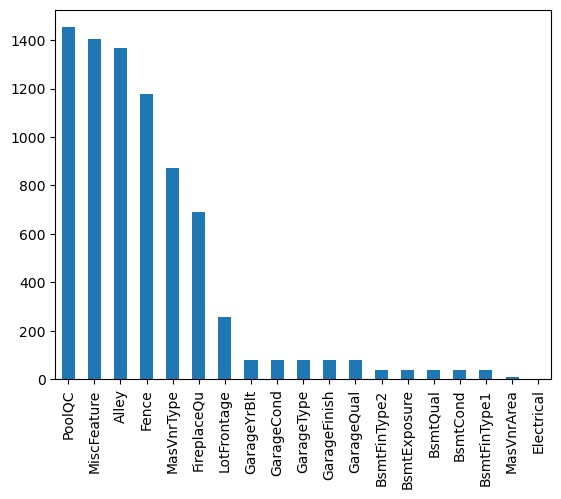

In [6]:
# Columns with the most missing values
df.isnull().sum().sort_values(ascending=False).head(19).plot(kind='bar');

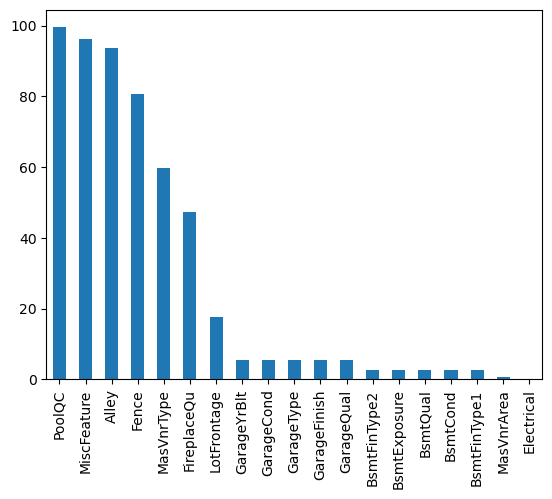

In [7]:
# The same, but as a percentage
(df.isnull().mean().sort_values(ascending=False).head(19) * 100).plot(kind='bar');

### To drop or to fill?

Some columns miss many more values than others!

We can draw the line at 30% missing values; above that, it is unnecessary to keep the columns.

The other columns, we will replace the missing values by something else. We can use the `mean` or `median`, or the `mode`.

We'll do that in the next steps, but let's first remove the columns with more than 30% missing values.

In [8]:
# The quick way:
columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

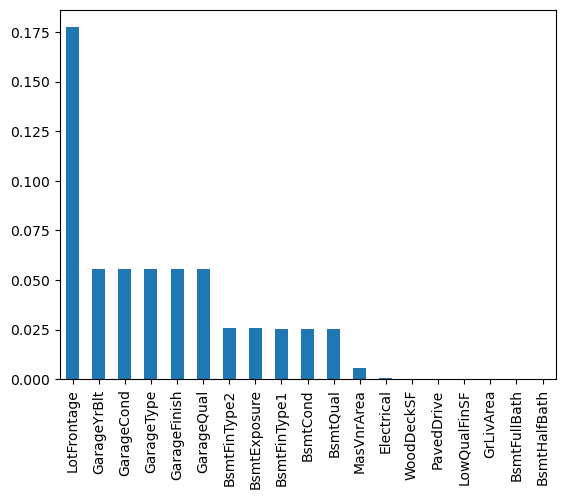

In [9]:
# The automated way

df_null = df.isnull().mean()
columns_to_drop = df_null[df_null > 0.3].index
df = df.drop(columns=columns_to_drop)

df.isnull().mean().sort_values(ascending=False).head(19).plot(kind='bar');

Looks good. Let's have a look at the remaining columns.

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


`Id` is just an identifier, not any data we can use to build a model. So we can drop that column.

In [11]:
df = df.drop(columns=['Id'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Picking X and y

After cleaning, we are left with 74 columns/features. That's a lot to choose from! If we were experts in real estate, we could use our domain knowledge and pick out features we know are important!

However, we're not taking that approach today. We'll use all of the features to try to reach a prediction, all 74 of them! This is clearly not the right way to do it, but whatever, this is just an example for training our skills.

In [12]:
X = df.drop(columns='SalePrice').copy()
y = df['SalePrice']

### Train test split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Imputing missing values

### Numeric Values

Let's start with the numeric missing values. We will impute those with the `mean`. Alternatively you could use the `median`.

Let's start by importing the `SimpleImputer` and creating a numeric inputer:

In [14]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='mean').set_output(transform='pandas')

`.set_output(transform='pandas')` This way the output of our transformer will be a nice DataFrame and not a basic NumPy array.

Let's continue. Up to you to make two variables `X_train_num` and `X_test_num` that contain only number features.

In [15]:
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

Now we can fit the `num_imputer` on the train data and transform the train and the test numeric data.


In [16]:
X_train_num_imputed = num_imputer.fit_transform(X_train_num)
X_test_num_imputed = num_imputer.transform(X_test_num)

In [17]:
# If the output is empty, you're all good!
assert X_train_num_imputed.isnull().sum().sum() == 0
assert X_test_num_imputed.isnull().sum().sum() == 0

### Non-Numeric Values

Now let's try to do the same for the non-numeric columns! 

This time we can't use the `mean` strategy because we have categorical data. So let's use the `most_frequent` strategy.

In [18]:
# Create a new imputer
cat_imputer = SimpleImputer(strategy='most_frequent').set_output(transform='pandas')

# Select the non number columns
X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

# Fit and transform
X_train_cat_imputed = cat_imputer.fit_transform(X_train_cat)
X_test_cat_imputed = cat_imputer.transform(X_test_cat)

In [19]:
# If the output is empty, you're all good!
assert X_train_cat_imputed.isnull().sum().sum() == 0
assert X_test_cat_imputed.isnull().sum().sum() == 0

## Normalization (Scaling)

We have imputed our data and we have no missing values left. So it's time to scale our data! We'll only do this on our numeric data.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform='pandas')
X_train_num_scaled = scaler.fit_transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)

In [21]:
# Run this cell to quickly check that you have no missing values anymore
# If the output is empty, you're all good!
assert X_train_num_scaled.isnull().sum().sum() == 0
assert X_test_num_scaled.isnull().sum().sum() == 0

## Encoding Categorical Values

Now let's do the essential preprocessing step for the non-numeric columns! Start from our `X_train_cat_imputed` and `X_test_cat_imputed`.

We'll use `OneHotEncoder` to encode the data!

In [30]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate One Hot Encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

# Fit and transform
X_train_cat_encoded = encoder.fit_transform(X_train_cat_imputed)
X_test_cat_encoded = encoder.transform(X_test_cat_imputed)

Have a look at your encoded columns.

In [31]:
X_train_cat_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1066,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
638,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
799,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
380,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
X_train_cat_encoded.describe()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.003425,0.045377,0.012842,0.791096,0.147260,0.003425,0.996575,0.337329,0.031678,0.006849,...,0.003425,0.083048,0.001712,0.866438,0.065925,0.003425,0.005993,0.015411,0.825342,0.083904
std,0.058445,0.208218,0.112643,0.406700,0.354517,0.058445,0.058445,0.473001,0.175217,0.082512,...,0.058445,0.276073,0.041363,0.340326,0.248257,0.058445,0.077216,0.123233,0.379837,0.277363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Bring numeric and non-numeric preprocessed data back together

Now we'll combine (`concat`) the numeric and non-numeric preprocessed columns together!

In [36]:
X_train_preproc = pd.concat((X_train_cat_encoded, X_train_num_scaled), axis=1)
X_test_preproc = pd.concat((X_test_cat_encoded, X_test_num_scaled), axis=1)

## Finally! Time to model a Linear Regression!

Let's try to use a Linear Regression to model house prices.

In [37]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()

model_linear.fit(X_train_preproc, y_train)

LinearRegression()

### Calculate the MAE

Let's now calculate the mean absolute error of the model on the test set.

In [38]:
from sklearn.metrics import mean_absolute_error

y_pred_lin = model_linear.predict(X_test_preproc)

mean_absolute_error(y_test, y_pred_lin)

129056482695492.94

The number we get represents the amount, in dollars, by which we were wrong about house prices!

To say if this is good or not, we have to compare against a baseline. Let's compare against what we'd get if we always predicted the mean house price.

In [39]:
y_pred_mean = [y_train.mean() for y in y_test]
mean_absolute_error(y_test, y_pred_mean)

62575.926451960964

We're definitely doing better than just using the mean, but we're still quite far off.

### How could we improve our model?

Predicting house prices is, believe it or not, a very complex endeavour! There's not one single quality that determines house prices well, it's one large complex soup of features.

Furthermore, there is a good probability that this is a **non-linear** task! Which would mean that our Linear Regression is ill-suited to handle it.

Whenever we encounter the limitations of a Linear Regression, there's a couple of things that we could try:

- See if there aren't any features that look *numeric* but that are *categorical* in reality.
- Apply some regularization techniques
- Create new features (e.g. the ratio of bathrooms to bedrooms in this case)
- Try more complex non-linear models